In [38]:
import numpy as np
import pandas as pd
import math
import re
import seaborn as sns
import matplotlib as plt
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import GridSearchCV
import sklearn
lm = LinearRegression()
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [39]:
#BASED ON V2 

In [40]:
train2 = pd.read_csv('./data/train_cleanV2.csv', index_col=0)

In [41]:
#Check for NA's
train2[train2.isna().any(axis=1)]

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,MasVnrType_Stone,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NoBsmt,BsmtExposure_NoExposure
Id,,,,,,,,,,,,,,,,,,,,,


In [42]:
#Split train into 
trainX2=train2.drop('SalePrice',axis=1)
trainY2=train2['SalePrice']

In [43]:
##Lasso with 20 alphas btw 0.001 and 100. Normalizatio = True, ALL features 
lasso_coefs = []
lasso_intercepts = []
lasso_R2  = []
alphaRange = np.linspace(1e-3,100,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha,normalize=True)  
    lasso.fit(trainX2,trainY2)
    lasso_intercepts.append(lasso.intercept_)
    lasso_coefs.append(lasso.coef_)
    lasso_R2.append(lasso.score(trainX2,trainY2)) 

In [44]:
#dataframe for all alphas with all features 
df_lasso_coef=pd.DataFrame(lasso_coefs,index=alphaRange,columns=trainX2.columns)
df_lasso_intercept=pd.DataFrame(lasso_intercepts,index=alphaRange,columns=['Intercept'])
df_lasso_R2= pd.DataFrame(lasso_R2,index=alphaRange, columns=['R2'])
df_lasso = pd.concat([df_lasso_R2,df_lasso_intercept,df_lasso_coef], axis=1)

In [45]:
#LassoCV with 10 folds Lasso with 20 alphas btw 0.001 and 100. Normalizatio = True, ALL features 
from sklearn.linear_model import LassoCV
alpha = np.linspace(1e-3,100,20)
regressor = LassoCV(alphas=list(alpha),max_iter=10000,cv=10, normalize=True, random_state=42)
regressor.fit(trainX2, trainY2)
lasso_mse = np.mean(regressor.mse_path_, axis=0)
print("Alphas: %s" % alpha)
print("Lasso RMSE on Training set :", lasso_mse)
print("Best Alpha using built-in LassoCV: %f" % regressor.alpha_)
#21.053 is the best Alpha per LassoCV

Alphas: [1.00000000e-03 5.26410526e+00 1.05272105e+01 1.57903158e+01
 2.10534211e+01 2.63165263e+01 3.15796316e+01 3.68427368e+01
 4.21058421e+01 4.73689474e+01 5.26320526e+01 5.78951579e+01
 6.31582632e+01 6.84213684e+01 7.36844737e+01 7.89475789e+01
 8.42106842e+01 8.94737895e+01 9.47368947e+01 1.00000000e+02]
Lasso RMSE on Training set : [5.80758563e+08 8.00513468e+08 6.17100959e+08 1.63040000e+09
 1.60718577e+09 8.87865576e+08 9.32335585e+08 7.32457686e+08
 3.37018188e+09 7.05015561e+08]
Best Alpha using built-in LassoCV: 15.790316


In [67]:
# select features based on LassoCV best alpha of 15
a=df_lasso.iloc[4:5,2:]!=0
new_alpha15=list(a[a.columns[(a != 0).any()]].columns)
trainX_alpha15=trainX2[new_alpha15]
# print(len(new_alpha15))
trainX_alpha15.columns

Index(['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'TotalBath',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'Exterior1st_Other',
       'Exterior1st_Plywood', 'Exterior2nd_HdBoard', 'MasVnrType_BrkFace',
       'SaleCondition_Family', 'SaleCondition_Partial', 'BsmtExposure_Gd',
       'BsmtExposure_NoBsmt', 'BsmtExposure_NoExposure'],
      dtype='object')

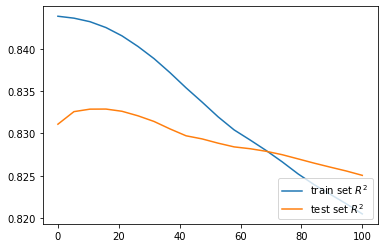

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha15, trainY2, test_size=0.3, random_state=42)

lasso_R2_train  = []
lasso_R2_test = []
alphaRange = np.linspace(1e-3,100,20)
for alpha in alphaRange:
    #X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha15, trainY2, test_size=0.3)
    lasso.set_params(alpha=alpha,normalize=True)  
    lasso.fit(X_train,Y_train)
    lasso_R2_train.append(lasso.score(X_train,Y_train)) 
    lasso_R2_test.append(lasso.score(X_test,Y_test)) 
plt.plot(alphaRange, lasso_R2_train, label=r'train set $R^2$')
plt.plot(alphaRange, lasso_R2_test, label=r'test set $R^2$')
plt.legend(loc=4)

In [54]:
##set alpha to around 70, train/test score 
X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha15, trainY2, test_size=0.3, random_state=42)

lasso.set_params(alpha=70,normalize=True)  
lasso.fit(X_train,Y_train)
print("train R^2: %f" %lasso.score(X_train,Y_train))
print("test R^: %f"%lasso.score(X_test,Y_test))

train R^2: 0.827596
test R^: 0.827783


In [55]:
##set alpha to 15.79 per LassoCV, train/test score 
X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha15, trainY2, test_size=0.3, random_state=42)

lasso.set_params(alpha=regressor.alpha_,normalize=True)  
lasso.fit(X_train,Y_train)
print("train R^2: %f" %lasso.score(X_train,Y_train))
print("test R^: %f"%lasso.score(X_test,Y_test))

train R^2: 0.842491
test R^: 0.832876


In [56]:
#cross validation for 38 features. 
from sklearn.model_selection import cross_validate
scores = cross_validate(lasso, trainX_alpha15, trainY2, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])      
print(scores['train_r2'])  

[-6.35684324e+08 -1.09664069e+09 -1.16384851e+09 -7.72243510e+08
 -2.07801737e+09]
[0.83090786 0.84135481 0.83473487 0.83719299 0.87642857]


In [57]:
##Ridge with 20 alphas btw 0.001 and 100. Normalizatio = True 
ridge_coefs = []
ridge_intercepts = []
ridge_R2  = []
MSE = []
alphaRange = np.linspace(1e-3,100,20)
for alpha in alphaRange:
    ridge.set_params(alpha=alpha,normalize=True)  
    ridge.fit(trainX2,trainY2)
    ridge_intercepts.append(ridge.intercept_)
    ridge_coefs.append(ridge.coef_)
    ridge_R2.append(ridge.score(trainX2,trainY2))  

In [58]:
#dataframe for all alphas with all features 
df_ridge_coef=pd.DataFrame(ridge_coefs,index=alphaRange,columns=trainX2.columns)
df_ridge_intercept=pd.DataFrame(ridge_intercepts,index=alphaRange,columns=['Intercept'])
df_ridge_R2= pd.DataFrame(ridge_R2,index=alphaRange, columns=['R2'])
df_ridge = pd.concat([df_ridge_R2,df_ridge_intercept,df_ridge_coef], axis=1)

In [59]:
#Ridge with full features 
from sklearn.linear_model import RidgeCV
alpha = np.linspace(1e-3,100,20)
regressor = RidgeCV(alphas=list(alpha),store_cv_values=True,normalize=True)
regressor.fit(trainX2, trainY2)
cv_mse = np.mean(regressor.cv_values_, axis=0)

print("Alphas: %s" % alpha)
print("Ridge RMSE on Training set :", cv_mse)
print("Best Alpha using built-in RidgeCV: %f" % regressor.alpha_)
#this is the second alpha

Alphas: [1.00000000e-03 5.26410526e+00 1.05272105e+01 1.57903158e+01
 2.10534211e+01 2.63165263e+01 3.15796316e+01 3.68427368e+01
 4.21058421e+01 4.73689474e+01 5.26320526e+01 5.78951579e+01
 6.31582632e+01 6.84213684e+01 7.36844737e+01 7.89475789e+01
 8.42106842e+01 8.94737895e+01 9.47368947e+01 1.00000000e+02]
Ridge RMSE on Training set : [1.37459353e+09 1.97399800e+09 2.65094609e+09 3.16676647e+09
 3.56251380e+09 3.87270060e+09 4.12122782e+09 4.32432290e+09
 4.49316038e+09 4.63560781e+09 4.75733340e+09 4.86251052e+09
 4.95427331e+09 5.03501781e+09 5.10660529e+09 5.17050252e+09
 5.22788040e+09 5.27968464e+09 5.32668711e+09 5.36952396e+09]
Best Alpha using built-in RidgeCV: 0.001000


In [60]:
# select features based on RidgeCV best alpha of 0.001
a=df_lasso.iloc[0:2,2:]!=0
new_alpha1=list(a[a.columns[(a != 0).any()]].columns)
trainX_alpha1=trainX2[new_alpha15]
print(len(new_alpha1))

75


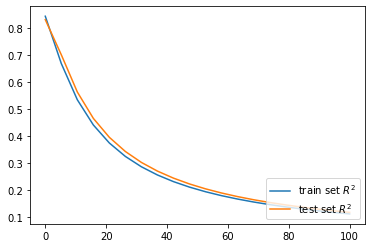

In [61]:

X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha15, trainY2, test_size=0.3, random_state=42)

ridge_R2_train  = []
ridge_R2_test = []
alphaRange = np.linspace(1e-3,100,20)
for alpha in alphaRange:
    #X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha15, trainY2, test_size=0.3)
    ridge.set_params(alpha=alpha,normalize=True)  
    ridge.fit(X_train,Y_train)
    ridge_R2_train.append(ridge.score(X_train,Y_train)) 
    ridge_R2_test.append(ridge.score(X_test,Y_test)) 
plt.plot(alphaRange, ridge_R2_train, label=r'train set $R^2$')
plt.plot(alphaRange, ridge_R2_test, label=r'test set $R^2$')
plt.legend(loc=4)

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha15, trainY2, test_size=0.3, random_state=42)

ridge.set_params(alpha=0.001,normalize=True)  
ridge.fit(X_train,Y_train)
print("train R^2: %f" %ridge.score(X_train,Y_train))
print("test R^2: %f"%ridge.score(X_test,Y_test))

train R^2: 0.843827
test R^2: 0.831263


In [63]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lasso, trainX_alpha1, trainY2, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])      
print(scores['train_r2'])  

[-6.35684324e+08 -1.09664069e+09 -1.16384851e+09 -7.72243510e+08
 -2.07801737e+09]
[0.83090786 0.84135481 0.83473487 0.83719299 0.87642857]


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha15, trainY2, test_size=0.3, random_state=42)
  
lm.fit(X_train,Y_train)
print("train R^2: %f" %lm.score(X_train,Y_train))
print("test R^2: %f"%lm.score(X_test,Y_test))

train R^2: 0.843827
test R^2: 0.831091


In [65]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lm, trainX_alpha15, trainY2, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])      
print(scores['train_r2'])  

[-6.38055063e+08 -1.09722233e+09 -1.11370436e+09 -7.44474181e+08
 -2.14847945e+09]
[0.83234052 0.84285895 0.83623509 0.83853471 0.87801592]


In [24]:
##further feature selection based on features not included from step wise 
#forward and back selection bsased on AIC value
feature_drop=['LotFrontage', 'BsmtCond', 'FireplaceQu', 'GarageArea', 'Exterior1st_Other','Exterior2nd_HdBoard', 
'MasVnrType_BrkFace','SaleCondition_Family', 'BsmtExposure_NoExposure']

In [25]:
# #filter out features with VIF>5
# exogs=list(trainX_alpha15.columns)
# data=trainX_alpha15
# VIF=sklearn_vif(exogs=exogs,data=data)
# feature_drop=list(VIF[VIF['VIF']>5].index)
# feature_drop

In [26]:
trainX_29=trainX_alpha15.drop(feature_drop,axis=1)

In [37]:
trainX_29.columns

Index(['LotArea', 'Neighborhood', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtFinType1', 'TotalBsmtSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'TotalBath',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'Exterior1st_Plywood',
       'SaleCondition_Partial', 'BsmtExposure_Gd', 'BsmtExposure_NoBsmt'],
      dtype='object')

In [27]:
#LassoCV with 10 folds Lasso with 20 alphas btw 0.001 and 100 for 35 features 
from sklearn.linear_model import LassoCV
alpha = np.linspace(1e-3,100,20)
regressor = LassoCV(alphas=list(alpha),max_iter=10000,cv=10, normalize=True, random_state=42)
regressor.fit(trainX_29, trainY2)
lasso_mse = np.mean(regressor.mse_path_, axis=0)
print("Alphas: %s" % alpha)
print("Lasso RMSE on Training set :", lasso_mse)
print("Best Alpha using built-in LassoCV: %f" % regressor.alpha_)
#21.053 is the best Alpha per LassoCV

Alphas: [1.00000000e-03 5.26410526e+00 1.05272105e+01 1.57903158e+01
 2.10534211e+01 2.63165263e+01 3.15796316e+01 3.68427368e+01
 4.21058421e+01 4.73689474e+01 5.26320526e+01 5.78951579e+01
 6.31582632e+01 6.84213684e+01 7.36844737e+01 7.89475789e+01
 8.42106842e+01 8.94737895e+01 9.47368947e+01 1.00000000e+02]
Lasso RMSE on Training set : [5.77510232e+08 7.97468331e+08 6.15331267e+08 1.59518241e+09
 1.60726058e+09 8.94906833e+08 9.37454364e+08 7.41375986e+08
 3.17291407e+09 7.11710531e+08]
Best Alpha using built-in LassoCV: 0.001000


In [28]:
##set alpha to 5.264 per RidgeCV, train/test score 
X_train, X_test, Y_train, Y_test = train_test_split(trainX_29, trainY2, test_size=0.3, random_state=42)

lasso.set_params(alpha=regressor.alpha_,normalize=True)  
lasso.fit(X_train,Y_train)
print("train R^2: %f" %lasso.score(X_train,Y_train))
print("test R^2: %f"%lasso.score(X_test,Y_test))

train R^2: 0.840243
test R^2: 0.831894


In [29]:
#cross validation for 29 features. 
from sklearn.model_selection import cross_validate
scores = cross_validate(lasso, trainX_29, trainY2, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])      
print(scores['train_r2'])  

[-6.26208543e+08 -1.06380619e+09 -1.13219506e+09 -7.79632847e+08
 -2.03517632e+09]
[0.82884256 0.83864295 0.83350422 0.83686203 0.87282872]


In [30]:
#based on MLR
X_train, X_test, Y_train, Y_test = train_test_split(trainX_29, trainY2, test_size=0.3, random_state=42)

lm.fit(X_train,Y_train)
print("train R^2: %f" %lm.score(X_train,Y_train))
print("test R^2: %f"%lm.score(X_test,Y_test))

train R^2: 0.840243
test R^2: 0.831893


In [31]:
#cross validation based on MLR
from sklearn.model_selection import cross_validate
scores = cross_validate(lm, trainX_29, trainY2, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])      
print(scores['train_r2'])  

[-6.26208713e+08 -1.06380650e+09 -1.13219246e+09 -7.79632522e+08
 -2.03518025e+09]
[0.82884256 0.83864295 0.83350422 0.83686203 0.87282872]


In [32]:

features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt','MasVnrArea', 'ExterQual', 'BsmtFinType1', 
'TotalBsmtSF','BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd','Functional', 'Fireplaces', 
'GarageYrBlt', 'WoodDeckSF', 'ScreenPorch','LotConfig', 'Exterior1st', 'MasVnrType',
'SaleCondition', 'SaleCondition', 'BsmtExposure','BsmtFullBath','BsmtHalfBath','FullBath',
           'HalfBath']

In [33]:
test = pd.read_csv('data/test.csv', index_col=0)

In [34]:
test.drop(list(set(test.columns)-set(features)),axis=1)

,LotFrontage,LotArea,LotConfig,OverallQual,OverallCond,YearBuilt,Exterior1st,MasVnrType,MasVnrArea,ExterQual,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,WoodDeckSF,ScreenPorch,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,Inside,5,6,1961,VinylSd,None,0.0,TA,...,2,1,TA,5,Typ,0,1961.0,140,120,Normal
1462,81.0,14267,Corner,6,6,1958,Wd Sdng,BrkFace,108.0,TA,...,3,1,Gd,6,Typ,0,1958.0,393,0,Normal
1463,74.0,13830,Inside,5,5,1997,VinylSd,None,0.0,TA,...,3,1,TA,6,Typ,1,1997.0,212,0,Normal
1464,78.0,9978,Inside,6,6,1998,VinylSd,BrkFace,20.0,TA,...,3,1,Gd,7,Typ,1,1998.0,360,0,Normal
1465,43.0,5005,Inside,8,5,1992,HdBoard,None,0.0,Gd,...,2,1,Gd,5,Typ,0,1992.0,0,144,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,Inside,4,7,1970,CemntBd,None,0.0,TA,...,3,1,TA,5,Typ,0,NaN,0,0,Normal
2916,21.0,1894,Inside,4,5,1970,CemntBd,None,0.0,TA,...,3,1,TA,6,Typ,0,1970.0,0,0,Abnorml
2917,160.0,20000,Inside,5,7,1960,VinylSd,None,0.0,TA,...,4,1,TA,7,Typ,1,1960.0,474,0,Abnorml


In [35]:
test['TotalBath']=test['BsmtFullBath']+train['BsmtHalfBath']/2+train['FullBath']+train['HalfBath']/2

NameError: name 'train' is not defined

In [ ]:
import statsmodels.api as sm
x = sm.add_constant(trainX_26)
model = sm.OLS(trainY2, x)
results = model.fit()
print(results.summary())


continuous and ordinal 
- some features dropped to zero with relatively small penalization
1. LotFrontage 
2. YearReModAdd - interesting it dropped to zero then back 
3. ExterCond - could be correlated to ExterQual 
4. BsmtCond - could be correlated to BsmtQual 
5. BsmtFinSF2 - could be correleated to Bsmt features
6. BsmtUnfSF - could be correlated to other Bsmt features 
7. BedrooAbvG - zero after 7 alphas 
8. GarageYrBlt - could be correlated to YrHouseBuilt 
9. GarageQual - could be correlated to OverallQual or other Garage features 
10. GarageCond - could be correlated to GarageQual or OverallQual
11. PavedDrive - could be related to OverallQual 
12. OpenPorchSF - maybe we should remove 
13. EnclosedPorchSF - maybe we should remove 
14. 3SsnPorch - zero at 6th alpha
15. PoolArea - maybe w should remove 
16. PoolQC - 
18. Fence
19. MoSold - 
20. YrSold - 
21. Gar2  (misc feature) - maybe we should remove
22. Shed (misc feature) - maybe we should remove 
23. TenC (misc feature tennis court) - maybe we should remoe 

- coefs decreased  to zero then above zero 
1. TotalBsmtSF
2. 1stFlrSf
3. ExterQual
4. TotalBsmtSF 



- coefs that increased then decreased 
1. BsmtFinType1

- coefs with increasing coefs 
1. OverallQual
2. ExterQual 
3. KitchenQual 
4.  GarageCars

- features that seem to be important
1. LotArea
2. OverallQual
3. OverallCond
4. YearBuilt
5. YearRemodAdd
6. MasVnrArea
7. ExterQual
8. BsmtQual
9. BsmtFinType1
10. BsmtFinTypeSF - maybe we should add together the SF?
11. HeatingQC
12. GrLivArea
13. KitchenAbvGr
14. KitchenQual
15. GarageFinish
16. GarageCars
17. WooddeckSF
18. TotalBaths



#CATEGORICAL 
1. MS_Zoning - seems like RM (residential medium density has the most weight on coefs)

2. Alley ( no vs paved)
3. LotShape
   - reg goes to zero quickly
4. LotConfig 
   -FR2, FR3, Inside go down to zero quickly 
5. Landslope - call go down to zero quickly 
6. Neighborhood 
  - BrDale, ClearCr, CollgCr, Gilbert, IDOTRR, MeadowV, NAmes, NPkVills, SWISU, Sawyer, Timber go down quickly 
7. condition 
  -PoSA, RRan, RRNe, RRNn go down quickly 
8. Bldgtype 
   - 2fmCon goes down to zero quicly 
9. HouseStyle
   0 2.5Unf, SFoyer, Slvl go down quickly 
10. RoofStyle
   - Gambrel,Mansard,Shed
   - Hip goes than to zero than back up 
11. RoofMatl  
   - Metal,Roll,Tar&Grv,WdShake go down quickly 
    - WdShngl seem to matter E
12. Exterior 1
    -only CemntBd,HdBoard, ImStuc, and Wd Sdng did NOT go down to zero quickly 
13. Exterior 2 
    - only _ImStucc, Stucco,Wd Shng did NOT go down to zero quickly 
     - VinylSd went to zero then back up 
14. MasVnrType
   - Seems like BrkFace is the only that did not go down to zero quicly 
15. Foundation - does not like seem any of the dummified features are important 
16. BsmtExposure
    -  only Gd and NoExposure seem to matter 
17. BsmtFinType2 - does not seem to matter 
18. Heating - only OthW seems to matter 
19. Electrical - does not seem to matter 
20. Central Air - does not seem to matter 
21. GarageType 
    -Builin went down to zero than back up 
22. SaleType 
   - only New Type seems to matter 
23. Sale Condition
    - only Family seem to matter 

In [ ]:
import statsmodels.api as sm
x = sm.add_constant(trainX_35)
model = sm.OLS(trainY2, x)
results = model.fit()
print(results.summary())

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif